# Key Input Technique Study
### Author: Sarah

## Structured Analysis
### Import all relevant libraries

In [1]:
!pip3 install pingouin

In [2]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

### Read csv file

In [3]:
raw_data_test = pd.read_csv("./test.csv")
# raw_data_1_1_normal = pd.read_csv("./1_1_normal.csv")
# raw_data_1_2_novel = pd.read_csv("./1_2_novel.csv")
# raw_data_2_1_novel = pd.read_csv("./2_1_novel.csv")
# raw_data_2_2_normal = pd.read_csv("./2_2_normal.csv")
# raw_data_3_1_novel = pd.read_csv("./3_1_novel.csv")
# raw_data_3_2_normal = pd.read_csv("./3_2_normal.csv")
# raw_data_4_1_normal = pd.read_csv("./4_1_normal.csv")
# raw_data_4_2_novel = pd.read_csv("./4_2_novel.csv")

### Combine the individual tables of the participants and save them

In [4]:
normal_input_technique = pd.concat([
    raw_data_1_1_normal,
    raw_data_2_2_normal,
    raw_data_3_2_normal,
    raw_data_4_1_normal
])

novel_input_technique = pd.concat([
    raw_data_1_2_novel,
    raw_data_2_1_novel,
    raw_data_3_1_novel,
    raw_data_4_2_novel
])

normal_input_technique.to_csv("normal_input_technique_table.csv", index=False)
normal_input_technique.to_csv("novel_input_technique_table.csv", index=False)

NameError: name 'raw_data_1_1_normal' is not defined

In [9]:
raw_data_test

,log_type,participant_id,keyboard_type,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,auto_complete,73,I,I,2021-05-17 09:50:19.062180,NaN,NaN,14814.814815
1,key_pressed,1,auto_complete,67,c,Ic,2021-05-17 09:50:19.293458,NaN,NaN,103.455857
2,key_pressed,1,auto_complete,72,h,Ich,2021-05-17 09:50:19.410419,NaN,NaN,103.174626
3,word_finished,1,auto_complete,32,,Ich,2021-05-17 09:50:19.662643,0.600593,NaN,59.884622
4,key_pressed,1,auto_complete,66,b,Ich b,2021-05-17 09:50:20.109408,NaN,NaN,45.804805
...,...,...,...,...,...,...,...,...,...,...
62,word_finished,1,auto_complete,32,,Der dritte Satz und dannist,2021-05-17 09:50:43.647182,3.289283,NaN,29.773425
63,key_pressed,1,auto_complete,69,E,Der dritte Satz und dannist E,2021-05-17 09:50:43.994711,NaN,NaN,29.839699
64,key_pressed,1,auto_complete,78,n,Der dritte Satz und dannist En,2021-05-17 09:50:44.143018,NaN,NaN,30.141711
65,key_pressed,1,auto_complete,68,d,Der dritte Satz und dannist End,2021-05-17 09:50:44.682129,NaN,NaN,29.975809


In [10]:
# normal_input_technique

In [11]:
# novel_input_technique

In [12]:
# whole data set
input_technique_table = pd.concat([
    normal_input_technique,
    novel_input_technique
])

pointing_technique_table

NameError: name 'normal_input_technique' is not defined

### Filter the data with relevant columns for analysis of task completion time and save the result

In [13]:
filtered_data = raw_data_test[
    ["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s", "words_per_minute"]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,log_type,participant_id,keyboard_type,content,sentence_time_in_s,words_per_minute
0,key_pressed,1,auto_complete,I,NaN,14814.814815
1,key_pressed,1,auto_complete,Ic,NaN,103.455857
2,key_pressed,1,auto_complete,Ich,NaN,103.174626
3,word_finished,1,auto_complete,Ich,NaN,59.884622
4,key_pressed,1,auto_complete,Ich b,NaN,45.804805
...,...,...,...,...,...,...
62,word_finished,1,auto_complete,Der dritte Satz und dannist,NaN,29.773425
63,key_pressed,1,auto_complete,Der dritte Satz und dannist E,NaN,29.839699
64,key_pressed,1,auto_complete,Der dritte Satz und dannist En,NaN,30.141711
65,key_pressed,1,auto_complete,Der dritte Satz und dannist End,NaN,29.975809


In [14]:
words_per_minute = filtered_data[filtered_data["log_type"] == "test_finished"]
words_per_minute = words_per_minute[["log_type", "participant_id", "keyboard_type", "content", "words_per_minute"]]
words_per_minute

,log_type,participant_id,keyboard_type,content,words_per_minute
66,test_finished,1,auto_complete,Der dritte Satz und dannist Ende,28.295599


In [15]:
time_per_sentence = filtered_data[(filtered_data["log_type"] == "sentence_finished") 
                                  | (filtered_data["log_type"] == "test_finished")]
time_per_sentence = time_per_sentence[["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s"]]
time_per_sentence

,log_type,participant_id,keyboard_type,content,sentence_time_in_s
20,sentence_finished,1,auto_complete,Ich bin nur ein TExt,6.579231
36,sentence_finished,1,auto_complete,Das ist nur vorübergehend,5.794756
66,test_finished,1,auto_complete,Der dritte Satz und dannist Ende,13.326508


## Statistics for all tables

In [18]:
# input_technique_table.describe()  # total

In [19]:
# normal_input_technique.describe()  # normal pointing technique

In [20]:
# novel_input_technique.describe()  # novel pointing technique

## Visualizations

### Scatter plots for task completion time

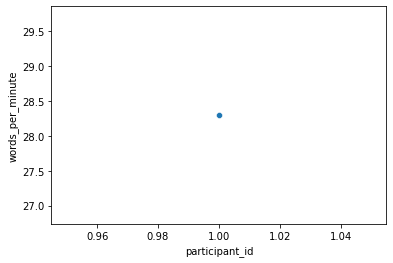

In [23]:
scatter_plot_ids = sns.scatterplot(
    data = words_per_minute,
    x = "participant_id",
    y = "words_per_minute",
)
scatter_plot_ids.set(xlabel = "participant_id", ylabel = "words_per_minute")
plt.show()

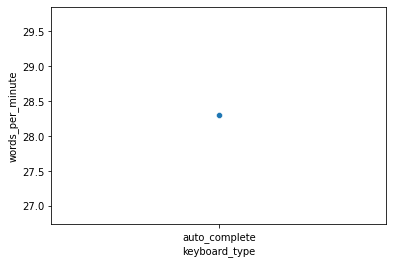

In [24]:
scatter_plot_con = sns.scatterplot(
    data = words_per_minute,
    x = "keyboard_type",
    y = "words_per_minute",
)
scatter_plot_con.set(xlabel = "keyboard_type", ylabel = "words_per_minute")
plt.show()

In [8]:
# scatter_plot_normal_con = sns.scatterplot(
    # data = words_per_minute[words_per_minute["keyboard_type"] == "auto_complete"],
    # x = CONDITION,
    # y = TASK_COMPLETION_TIME,
# )
# scatter_plot_normal_con.set(xlabel=CONDITION_LABEL + WITH_NORMAL, ylabel=TASK_COMPLETION_TIME_LABEL)
# plt.show()

NameError: name 'correct_clicksraw_data_test' is not defined

In [ ]:
scatter_plot_novel_con = sns.scatterplot(
    data = words_per_minute[words_per_minute["keyboard_type"] == "normal"],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
)
scatter_plot_novel_con.set(xlabel=CONDITION_LABEL + WITH_NOVEL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

In [ ]:
scatter_plot_normal_ids = sns.scatterplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME,
    hue=PARTICIPANT_ID,
)
scatter_plot_normal_ids.set(xlabel=CONDITION_LABEL + WITH_NORMAL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

In [ ]:
scatter_plot_novel_ids = sns.scatterplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME,
    hue=PARTICIPANT_ID,
)
scatter_plot_novel_ids.set(xlabel=CONDITION_LABEL + WITH_NOVEL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

### Swarm plots for task completion time

In [ ]:
swarm_plot_con_normal = sns.swarmplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    y=TASK_COMPLETION_TIME,
    x=CONDITION,
)
swarm_plot_con_normal.set(xlabel=CONDITION_LABEL + WITH_NORMAL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

In [ ]:
swarm_plot_con_novel = sns.swarmplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    y=TASK_COMPLETION_TIME,
    x=CONDITION,
)
swarm_plot_con_novel.set(xlabel=CONDITION_LABEL + WITH_NOVEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

In [ ]:
swarm_plot_pointer = sns.swarmplot(
    data=correct_clicks,
    y=TASK_COMPLETION_TIME,
    x=POINTER_TYPE,
)
swarm_plot_pointer.set(xlabel=POINTER_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

### Boxplots for task completion time

In [ ]:
box_plot_con_normal = sns.boxplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME
)

box_plot_con_normal.set(xlabel=CONDITION_LABEL + WITH_NORMAL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

In [ ]:
box_plot_con_novel = sns.boxplot(
    data=correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x=CONDITION,
    y=TASK_COMPLETION_TIME
)

box_plot_con_novel.set(xlabel=CONDITION_LABEL + WITH_NOVEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

In [ ]:
box_plot_con = sns.boxplot(
    data=correct_clicks,
    x=CONDITION,
    y=TASK_COMPLETION_TIME
)

box_plot_con.set(xlabel=CONDITION_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)

plt.show()

In [ ]:
box_plot_pointer = sns.boxplot(
    data=correct_clicks,
    x=POINTER_TYPE,
    y=TASK_COMPLETION_TIME
)

box_plot_pointer.set(xlabel=POINTER_LABEL, ylabel=TASK_COMPLETION_TIME_LABEL)
plt.show()

## T-test

__Tests for variance homogeneity and normal distribution__

In [ ]:
pg.homoscedasticity(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=POINTER_TYPE, method="bartlett")

In [ ]:
pg.normality(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=POINTER_TYPE)

In [ ]:
pg.homoscedasticity(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=CONDITION, method="bartlett")

In [ ]:
pg.normality(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=CONDITION)

No normal distribution for all, therefore use of Welch-Anova test

In [ ]:
pg.welch_anova(data=correct_clicks, dv=TASK_COMPLETION_TIME, between=POINTER_TYPE)

In [ ]:
pg.welch_anova(data=correct_clicks, dv=DISTANCE_TO_START_POSITION, between=POINTER_TYPE)